In [556]:
import json
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
import time

In [489]:
with open(r'C:\Users\Guo\Downloads\WatchData (29).json') as f:
    data=json.load(f)

In [490]:
len(data)

22

In [491]:
d_data=[]
for i in range(len(data)):
    d_data.append(data[i]['sensor_data'])

In [558]:
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(gravity_time[0]))

'2019-04-16 16:36:31'

In [492]:
for i in range(len(data)):
    sensors=[]
    dd_data=data[i]['sensor_data']
    
    for sensorData in dd_data:
        if sensorData['sensor'] not in sensors:
            sensors.append(sensorData['sensor'])
    print(data[i]["device_uuid"]+"  "+data[i]['device_model'])
    print(len(dd_data))
    print("sensors:"+str(sensors))

9e55ccd7f60770be  TicWatch E2
1990
sensors:['android.sensor.low_latency_offbody_detect', 'android.sensor.gravity', 'android.sensor.linear_acceleration', 'android.sensor.game_rotation_vector', 'android.sensor.gyroscope']
c3f673ef851e96bb  TicWatch E2
1947
sensors:['android.sensor.low_latency_offbody_detect', 'android.sensor.gravity', 'android.sensor.linear_acceleration', 'android.sensor.game_rotation_vector', 'android.sensor.gyroscope']
9fd1b5e937cf9793  TicWatch C2
1997
sensors:['android.sensor.low_latency_offbody_detect', 'android.sensor.gravity', 'android.sensor.game_rotation_vector', 'android.sensor.linear_acceleration', 'android.sensor.gyroscope']
c3f673ef851e96bb  TicWatch E2
6150
sensors:['android.sensor.game_rotation_vector', 'android.sensor.gravity', 'android.sensor.linear_acceleration', 'android.sensor.gyroscope']
9fd1b5e937cf9793  TicWatch C2
6064
sensors:['android.sensor.gyroscope', 'android.sensor.linear_acceleration', 'android.sensor.game_rotation_vector', 'android.sensor.

'2012-09-13 01:22:50'

In [551]:
gravity_time=[]
gravity_timestamp=[]
gravity_x=[]
gravity_y=[]
gravity_z=[]
lineAcc_time=[]
lineAcc_timestamp=[]
lineAcc_x=[]
lineAcc_y=[]
lineAcc_z=[]
gyro_time=[]
gyro_timestamp=[]
gyro_x=[]
gyro_y=[]
gyro_z=[]
RV_time=[]
RV_timestamp=[]
RV_x=[]
RV_y=[]
RV_z=[]
GR_counter=0
LA_counter=0
MF_counter=0
RV_counter=0
HR_counter=0
GY_counter=0
for sensorData in d_data[13]:
    if sensorData['sensor'] == 'android.sensor.gravity':
        GR_counter+=1
        gravity_time.append(sensorData['time'])
        gravity_timestamp.append(sensorData['timestamp'])
        gravity_x.append(sensorData['data']['x'])
        gravity_y.append(sensorData['data']['y'])
        gravity_z.append(sensorData['data']['z'])
    if sensorData['sensor'] == 'android.sensor.linear_acceleration':
        LA_counter+=1
        lineAcc_time.append(sensorData['time'])
        lineAcc_timestamp.append(sensorData['timestamp'])
        lineAcc_x.append(sensorData['data']['x'])
        lineAcc_y.append(sensorData['data']['y'])
        lineAcc_z.append(sensorData['data']['z'])
    if sensorData['sensor'] == 'android.sensor.gyroscope':
        GY_counter +=1
        gyro_time.append(sensorData['time'])
        gyro_timestamp.append(sensorData['timestamp'])
        gyro_x.append(sensorData['data']['x'])
        gyro_y.append(sensorData['data']['y'])
        gyro_z.append(sensorData['data']['z'])
    if sensorData['sensor'] == 'android.sensor.game_rotation_vector':
        RV_counter +=1
        RV_x.append(sensorData['data']['x'])
        RV_y.append(sensorData['data']['y'])
        RV_z.append(sensorData['data']['z'])
        RV_time.append(sensorData['time'])
        RV_timestamp.append(sensorData['timestamp'])
    if sensorData['sensor'] == 'android.sensor.heart_rate':
        HR_counter+=1
print(GR_counter,LA_counter,GY_counter,RV_counter,HR_counter)

1319 1319 1316 1319 0


In [552]:
gravity_time_int=[]
lineAcc_time_int=[]
gyro_time_int=[]
RV_time_int=[]
gravity_timestamp_int=[]
lineAcc_timestamp_int=[]
gyro_timestamp_int=[]
RV_timestamp_int=[]
for i in range (1,GR_counter):
    gravity_time_int.append((gravity_time[i]-gravity_time[i-1]))#/1000000000)
    gravity_timestamp_int.append((gravity_timestamp[i]-gravity_timestamp[i-1])/1000000000)
for i in range (LA_counter-1):
    lineAcc_time_int.append((lineAcc_time[i+1]-lineAcc_time[i]))#/1000000000)
    lineAcc_timestamp_int.append((lineAcc_timestamp[i+1]-lineAcc_timestamp[i])/1000000000)
for i in range (GY_counter-1):
    gyro_time_int.append((gyro_time[i+1]-gyro_time[i]))#/1000000000)
    gyro_timestamp_int.append((gyro_timestamp[i+1]-gyro_timestamp[i])/1000000000)
for i in range (RV_counter-1):
    RV_time_int.append((RV_time[i+1]-RV_time[i]))#/1000000000)
    RV_timestamp_int.append((RV_timestamp[i+1]-RV_timestamp[i])/1000000000)

In [553]:
print("gravity time "+str(sum(gravity_time_int)))
print("gravity timestamp "+str(sum(gravity_timestamp_int)))
print("lineAcc time "+str(sum(lineAcc_time_int)))
print("lineAcc timestamp "+str(sum(lineAcc_timestamp_int)))
print("gyro time "+str(sum(gyro_time_int)))
print("gyro timestamp "+str(sum(gyro_timestamp_int)))
print("RV time "+str(sum(RV_time_int)))
print("RV timestamp "+str(sum(RV_timestamp_int)))

gravity time 60
gravity timestamp 60.02208896799996
lineAcc time 59
lineAcc timestamp 60.02208896799996
gyro time 59
gyro timestamp 59.886590919999946
RV time 60
RV timestamp 60.02208896799996


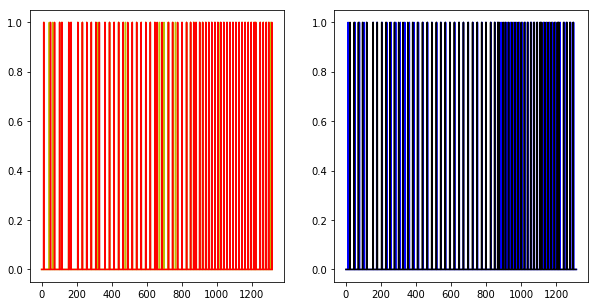

In [554]:
fig=plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot(RV_time_int,'y')
plot(gravity_time_int,'r')
plt.subplot(1,2,2)
plot(lineAcc_time_int,'b')
plot(gyro_time_int,'k')


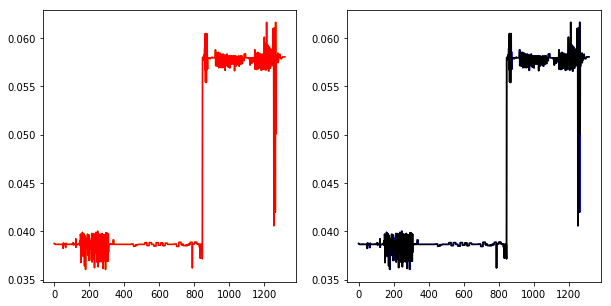

In [555]:
fig=plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot(RV_timestamp_int,'y')
plot(gravity_timestamp_int,'r')
plt.subplot(1,2,2)
plot(lineAcc_timestamp_int,'b')
plot(gyro_timestamp_int,'k')